# Q 4 b)

In [2]:
import numpy as np

In [3]:
A = np.array([[2,1,3],[1,9,1],[4,6,5]])
n = A.shape[0]

In [4]:
U = np.array(A,dtype = float)
L = np.identity(n)

for j in range(0,n):
    for i in range(j+1,n):
        L[i,j] = (U[i,j]/U[j,j])
        
        U[i,:] = U[i,:] - L[i,j]*U[j,:]

In [5]:
L

array([[1.        , 0.        , 0.        ],
       [0.5       , 1.        , 0.        ],
       [2.        , 0.47058824, 1.        ]])

In [6]:
U

array([[ 2.        ,  1.        ,  3.        ],
       [ 0.        ,  8.5       , -0.5       ],
       [ 0.        ,  0.        , -0.76470588]])

In [7]:
A

array([[2, 1, 3],
       [1, 9, 1],
       [4, 6, 5]])

In [8]:
L@U

array([[2., 1., 3.],
       [1., 9., 1.],
       [4., 6., 5.]])

# Q 4c)

In [10]:
A = np.array([[2,1,3],[1,9,1],[4,6,5]])
n = A.shape[0]

### Logic need n elemtary matrices E

In [12]:
def E2(i,j,c):
    e2 = np.identity(n)
    e2[i, j] = c
    return e2   

In [13]:
E2(1,0,-1/2)

array([[ 1. ,  0. ,  0. ],
       [-0.5,  1. ,  0. ],
       [ 0. ,  0. ,  1. ]])

In [14]:
E2(2,0,-2)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [-2.,  0.,  1.]])

In [15]:
E2(2,1,-8/17)

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.        , -0.47058824,  1.        ]])

# $$E_{21}E_{31}E_{32}A=U$$
# $$ A=(E_{32})^{-1}(E_{31})^{-1}(E_{21})^{-1}U$$
# $$ L= (E_{32})^{-1}(E_{31})^{-1}(E_{21})^{-1}$$
### Inverse of identity matrix with one other entry. Just change sign of other entry

In [17]:
L=E2(1,0,1/2)@E2(2,0,2)@E2(2,1,8/17)
L

array([[1.        , 0.        , 0.        ],
       [0.5       , 1.        , 0.        ],
       [2.        , 0.47058824, 1.        ]])

In [18]:
U = E2(2,1,-8/17)@E2(2,0,-2)@E2(1,0,-1/2)@A
U

array([[ 2.        ,  1.        ,  3.        ],
       [ 0.        ,  8.5       , -0.5       ],
       [ 0.        ,  0.        , -0.76470588]])

# Q4 d)

In [20]:
import scipy.linalg as spl # SciPy Linear Algebra Library
import matplotlib.pyplot as plt

P,L,U = spl.lu(A)


In [21]:
U

array([[ 4.        ,  6.        ,  5.        ],
       [ 0.        ,  7.5       , -0.25      ],
       [ 0.        ,  0.        ,  0.43333333]])

In [22]:
L

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.25      ,  1.        ,  0.        ],
       [ 0.5       , -0.26666667,  1.        ]])

In [23]:
L@U

array([[4., 6., 5.],
       [1., 9., 1.],
       [2., 1., 3.]])

In [24]:
P@A

array([[4., 6., 5.],
       [1., 9., 1.],
       [2., 1., 3.]])

# Q5 a)

In [26]:
import numpy as np
import math
import numpy.linalg as npl
from numpy.linalg import norm

In [27]:
A = np.array([[2,1,3],[1,9,1],[4,6,5]])
n = 3

In [28]:
(Q,R) = npl.qr(A)
(Q,R)

(array([[-0.43643578,  0.3020723 , -0.84751173],
        [-0.21821789, -0.94937007, -0.22600313],
        [-0.87287156,  0.08630637,  0.48025665]]),
 array([[-4.58257569, -7.63762616, -5.89188304],
        [ 0.        , -7.72442015,  0.38837867],
        [ 0.        ,  0.        , -0.36725508]]))

In [29]:
(a1, a2, a3) = np.transpose(A)
a1

array([2, 1, 4])

In [30]:
u1 = a1
e1 = a1/np.sqrt((a1@a1))
e1

array([0.43643578, 0.21821789, 0.87287156])

In [31]:
u2 = a2-((a2@u1)/(u1@u1))*u1
e2 = u2/(np.sqrt(u2@u2))
u2

array([-2.33333333,  7.33333333, -0.66666667])

In [32]:
u3 = a3 - (a3@u2/(u2@u2))*u2 - (a3@u1/(u1@u1))*u1
e3 = u3/np.sqrt(u3@u3)
u3

array([ 0.31125299,  0.0830008 , -0.1763767 ])

In [33]:
print(a3@u2)

-3.0000000000000027


# Q5 b)

In [35]:
A = np.array([[2,1,3],[1,9,1],[4,6,5]])
(a1, a2, a3) = np.transpose(A)
n = 3

In [36]:
u1 = a1 - norm(a1)*np.array([1,0,0])
print(u1)
v1 = u1/norm(u1)
H1 = np.identity(3) - 2*np.outer(v1,v1)
print(H1)

[-2.58257569  1.          4.        ]
[[ 0.43643578  0.21821789  0.87287156]
 [ 0.21821789  0.91550378 -0.33798489]
 [ 0.87287156 -0.33798489 -0.35193956]]


In [37]:
A1=H1@A
print(A1)

[[ 4.58257569e+00  7.63762616e+00  5.89188304e+00]
 [-2.22044605e-16  6.42984255e+00 -1.19766999e-01]
 [-4.44089210e-16 -4.28062979e+00  5.20932003e-01]]


In [38]:
a2 = A1[1:,1]
print(a2)
u2 = a2 - (-np.sign(a2[0]))*norm(a2)*np.array([1,0])
v2 = u2/norm(u2)
print(v2)
H2 = np.identity(3)
print(H2)
H2[1:,1:] -= 2*np.outer(v2,v2)
print(H2)

[ 6.42984255 -4.28062979]
[ 0.95718456 -0.28947836]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 1.          0.          0.        ]
 [ 0.         -0.83240456  0.55416843]
 [ 0.          0.55416843  0.83240456]]


In [39]:
A2=H2@A1
A2

array([[ 4.58257569e+00,  7.63762616e+00,  5.89188304e+00],
       [-6.12692790e-17, -7.72442015e+00,  3.88378667e-01],
       [-4.92711993e-16,  8.88178420e-16,  3.67255084e-01]])

In [40]:
a3 = A2[2:,2]
print(a3)
u3 = a3 - (-np.sign(a3[0]))*norm(a3)*np.array([1])
print(u3)
v3 = u3/norm(u3)
print(v3)
H3 = np.identity(3)
print(H3)
H3[2:,2:] -= 2*np.outer(v3,v3)
print(H3)

[0.36725508]
[0.73451017]
[1.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]


In [41]:
A3 = H3@A2
A3

array([[ 4.58257569e+00,  7.63762616e+00,  5.89188304e+00],
       [-6.12692790e-17, -7.72442015e+00,  3.88378667e-01],
       [ 4.92711993e-16, -8.88178420e-16, -3.67255084e-01]])

In [42]:
Q = H1.T@H2.T@H3.T
Q

array([[ 0.43643578,  0.3020723 , -0.84751173],
       [ 0.21821789, -0.94937007, -0.22600313],
       [ 0.87287156,  0.08630637,  0.48025665]])

# Q5 c)

In [44]:
(Q,R) = npl.qr(A)
(Q,R)

(array([[-0.43643578,  0.3020723 , -0.84751173],
        [-0.21821789, -0.94937007, -0.22600313],
        [-0.87287156,  0.08630637,  0.48025665]]),
 array([[-4.58257569, -7.63762616, -5.89188304],
        [ 0.        , -7.72442015,  0.38837867],
        [ 0.        ,  0.        , -0.36725508]]))

# Q6 a)

In [91]:
from numpy.linalg import eig
A = np.array([[2,1,3],[1,9,1],[4,6,5]])
n=A.shape[0]

In [97]:
Anew=A.T@A

In [99]:
eig(Anew)

EigResult(eigenvalues=array([1.49810255e+02, 4.67254584e-02, 2.41430199e+01]), eigenvectors=array([[-0.31674038, -0.80848561,  0.49601064],
       [-0.86431998,  0.03062929, -0.50200878],
       [-0.39067442,  0.58771836,  0.7084918 ]]))

In [131]:
np.linalg.svd(A)

SVDResult(U=array([[-0.21812822,  0.53230056, -0.81797078],
       [-0.69334172, -0.67437462, -0.25396089],
       [-0.68680225,  0.51173723,  0.51616632]]), S=array([12.23969994,  4.91355471,  0.21616072]), Vh=array([[-0.31674038, -0.86431998, -0.39067442],
       [ 0.49601064, -0.50200878,  0.7084918 ],
       [ 0.80848561, -0.03062929, -0.58771836]]))

In [125]:
V=Vt.T

In [129]:
AV = A@V
AV

array([[-2.66982399,  2.6154879 , -0.17681316],
       [-8.48629464, -3.31357657, -0.05489637],
       [-8.4062535 ,  2.51444889,  0.11157489]])

# Q6 b)

In [134]:
U=np.linalg.svd(A)[0]
U

array([[-0.21812822,  0.53230056, -0.81797078],
       [-0.69334172, -0.67437462, -0.25396089],
       [-0.68680225,  0.51173723,  0.51616632]])

In [136]:
Singvals = np.linalg.svd(A)[1]
Singvals

array([12.23969994,  4.91355471,  0.21616072])

In [138]:
V = np.linalg.svd(A)[2].T
V

array([[-0.31674038,  0.49601064,  0.80848561],
       [-0.86431998, -0.50200878, -0.03062929],
       [-0.39067442,  0.7084918 , -0.58771836]])

# Q7 

## a)

In [252]:
A = np.array([[2,1,3],[1,9,1],[4,6,5]])
A1 = A[:,0]
print("A1=%a"%A1)
A2 = A[:,1]
print("A2=%a"%A2)
A3 = A[:,2]
print("A3=%a"%A3)

A1=array([2, 1, 4])
A2=array([1, 9, 6])
A3=array([3, 1, 5])


Text(0.5, 0, 'z')

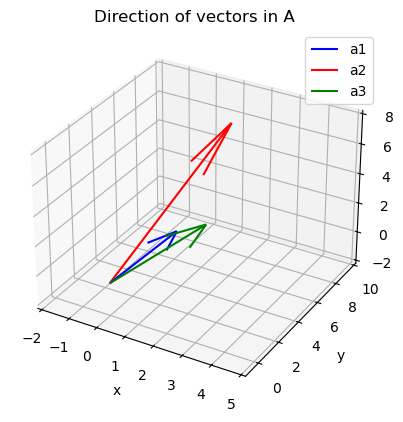

In [254]:
fig = plt.figure()

ax = plt.axes(projection = '3d')

start = np.array([0,0,0])
ax.set_xlim((-2,5))
ax.set_ylim((-1,10))
ax.set_zlim((-2,8))

ax.quiver(start[0],start[1],start[2],A1[0],A1[1],A1[2],color='blue',label='a1')
ax.quiver(start[0],start[1],start[2],A2[0],A2[1],A2[2],color='red',label='a2')
ax.quiver(start[0],start[1],start[2],A3[0],A3[1],A3[2],color='green',label='a3')

ax.legend()
ax.set_title("Direction of vectors in A")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# b)

In [256]:
A = np.array([[2,1,3],[1,9,1],[4,6,5]])
(Q,R) = npl.qr(A)
(Q,R)

(array([[-0.43643578,  0.3020723 , -0.84751173],
        [-0.21821789, -0.94937007, -0.22600313],
        [-0.87287156,  0.08630637,  0.48025665]]),
 array([[-4.58257569, -7.63762616, -5.89188304],
        [ 0.        , -7.72442015,  0.38837867],
        [ 0.        ,  0.        , -0.36725508]]))

In [258]:
Q1 = Q[:,0]
print("Q1=%a"%Q1)
Q2 = Q[:,1]
print("Q2=%a"%Q2)
Q3 = Q[:,2]
print("Q3=%a"%Q3)

Q1=array([-0.43643578, -0.21821789, -0.87287156])
Q2=array([ 0.3020723 , -0.94937007,  0.08630637])
Q3=array([-0.84751173, -0.22600313,  0.48025665])


Text(0.5, 0, 'z')

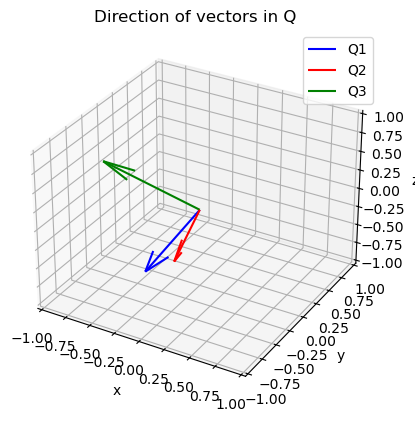

In [275]:
fig = plt.figure()

ax = plt.axes(projection = '3d')

start = np.array([0,0,0])
ax.set_xlim((-1,1))
ax.set_ylim((-1,1))
ax.set_zlim((-1,1))

ax.quiver(start[0],start[1],start[2],Q1[0],Q1[1],Q1[2],color='blue',label='Q1')
ax.quiver(start[0],start[1],start[2],Q2[0],Q2[1],Q2[2],color='red',label='Q2')
ax.quiver(start[0],start[1],start[2],Q3[0],Q3[1],Q3[2],color='green',label='Q3')

ax.legend()
ax.set_title("Direction of vectors in Q")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## c)

In [263]:
U=np.linalg.svd(A)[0]
U

array([[-0.21812822,  0.53230056, -0.81797078],
       [-0.69334172, -0.67437462, -0.25396089],
       [-0.68680225,  0.51173723,  0.51616632]])

In [267]:
U1 = U[:,0]
print("U1=%a"%U1)
U2 = U[:,1]
print("U2=%a"%U2)
U3 = U[:,2]
print("U3=%a"%U3)

U1=array([-0.21812822, -0.69334172, -0.68680225])
U2=array([ 0.53230056, -0.67437462,  0.51173723])
U3=array([-0.81797078, -0.25396089,  0.51616632])


Text(0.5, 0, 'z')

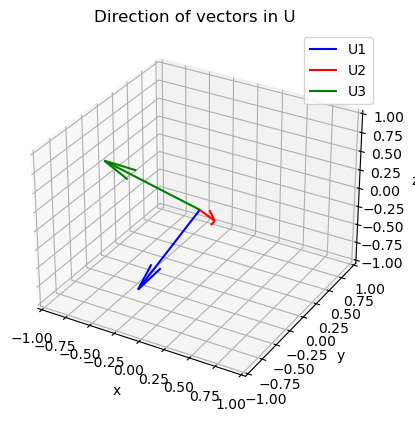

In [277]:
fig = plt.figure()

ax = plt.axes(projection = '3d')

start = np.array([0,0,0])
ax.set_xlim((-1,1))
ax.set_ylim((-1,1))
ax.set_zlim((-1,1))

ax.quiver(start[0],start[1],start[2],U1[0],U1[1],U1[2],color='blue',label='U1')
ax.quiver(start[0],start[1],start[2],U2[0],U2[1],U2[2],color='red',label='U2')
ax.quiver(start[0],start[1],start[2],U3[0],U3[1],U3[2],color='green',label='U3')

ax.legend()
ax.set_title("Direction of vectors in U")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [265]:
V = np.linalg.svd(A)[2].T
V

array([[-0.31674038,  0.49601064,  0.80848561],
       [-0.86431998, -0.50200878, -0.03062929],
       [-0.39067442,  0.7084918 , -0.58771836]])

In [271]:
V1 = V[:,0]
print("V1=%a"%V1)
V2 = V[:,1]
print("V2=%a"%V2)
V3 = V[:,2]
print("V3=%a"%V3)

V1=array([-0.31674038, -0.86431998, -0.39067442])
V2=array([ 0.49601064, -0.50200878,  0.7084918 ])
V3=array([ 0.80848561, -0.03062929, -0.58771836])


Text(0.5, 0, 'z')

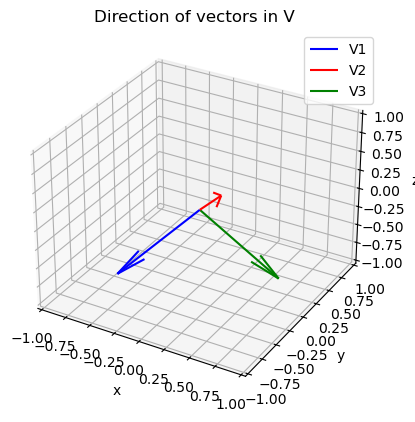

In [279]:
fig = plt.figure()

ax = plt.axes(projection = '3d')

start = np.array([0,0,0])
ax.set_xlim((-1,1))
ax.set_ylim((-1,1))
ax.set_zlim((-1,1))

ax.quiver(start[0],start[1],start[2],V1[0],V1[1],V1[2],color='blue',label='V1')
ax.quiver(start[0],start[1],start[2],V2[0],V2[1],V2[2],color='red',label='V2')
ax.quiver(start[0],start[1],start[2],V3[0],V3[1],V3[2],color='green',label='V3')

ax.legend()
ax.set_title("Direction of vectors in V")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')